<a href="https://colab.research.google.com/github/quintonmills/HousePricePredict/blob/main/HPDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Analysis


In [4]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [5]:
#Load dataset
data = pd.read_csv('train.csv')

#Rows and columns of the data
print(data.shape)

#Visualise the dataset
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Drop id, its just a number given to identify each house
data.drop('Id', axis = 1, inplace = True)
data.shape

(1460, 80)

In [7]:
#The hosue price dataset contains 1460 rows(houses) and 80 columns(variables)
#79 are predictive variabels and 1 is the target variable: saleprice


We will analyse the following:


1.   The target variable
2.   Variable types (categorical and numerical)
3. Missing data
4. Numerical Values
 *   Discrete
 *   Continuous
 *Distributions
 *Transformations
 5. Categorical variables
  *Cardinality
  *Rare Labels
  *Special mappings

6. Additional Reading Resources



###Target

lets begin by exploring the target distribution

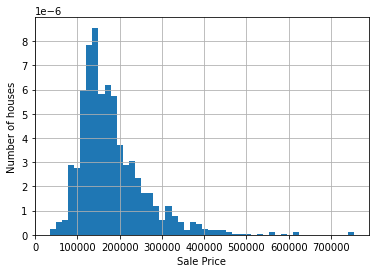

In [8]:
#histogram to evaluate target distribution

data['SalePrice'].hist(bins=50, density = True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

##We can see that the target is continous, and the distributions is skewed towards the right
#We can improve the value spread with a mathimatical transformation

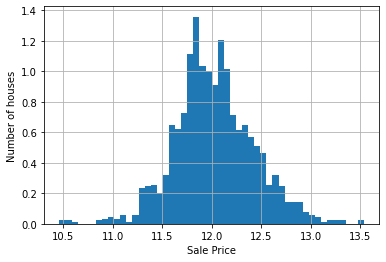

In [9]:
#Lets transform the target using the logarithm
np.log(data['SalePrice']).hist(bins=50, density = True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

###Variable Types
lets identify the categorical and numerical variables

In [10]:
cat_vars = [var for var in data.columns if data[var].dtype =='O']

#add MSSubClass to the list of catergorical variables
cat_vars = cat_vars + ['MSSubClass']

#Number of categorical variables
len(cat_vars)

44

In [11]:
#Cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')


In [12]:
#Identify the numerical variables

num_vars = [
            var for var in data.columns if var not in cat_vars and var !=  'SalePrice'
]

#Number of numerical variables
len(num_vars)

35

###Missing values
Find out which variables of the dataset contain missing values

In [13]:
#Make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

#determine percentage of missing values (Expressed as decimals)
#and display the result ordered by % of missing data

data[vars_with_na].isnull().mean().sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

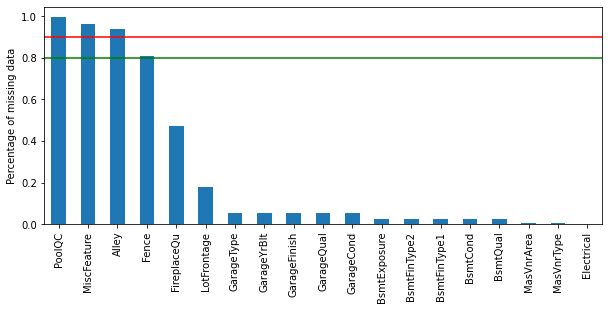

In [14]:
#Visualise percentage of missing values

data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [15]:
#Determine which variables from those with missing data are numericals
#and which are categorical

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


###Relationship between missing data and sale price

In [16]:
#Evaluate the price of the house in those observations where the information is missing. 
#Well do this for each variable that shows missing information
def analyse_na_value(df, var):
  #Copy of the dataframe so that we dont override the original data
  df = df.copy()

  #make an interim variable that indicates 1 if the observation was missing
  #or 0 otherwise
  df[var] = np.where(df[var].isnull(), 1, 0)

  #Compare the median SalePrice in the observation where data is missing
  #vs the obervations where data is available

  #Determine the median price in the groups 1 and 0, and the standard deviation
  #of the sale price, and capture the results in a temporary dataset

  tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

  # plot into a bar graph
  tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

  plt.show()

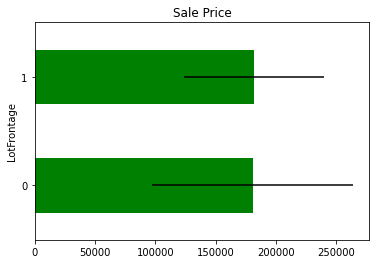

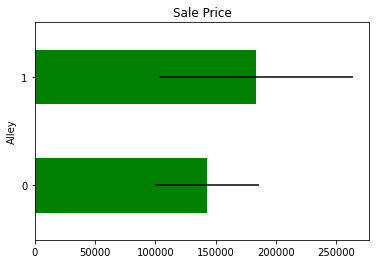

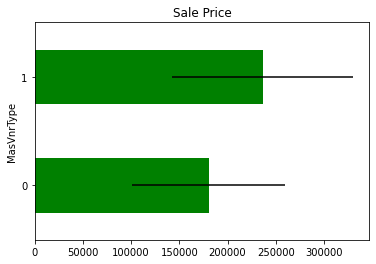

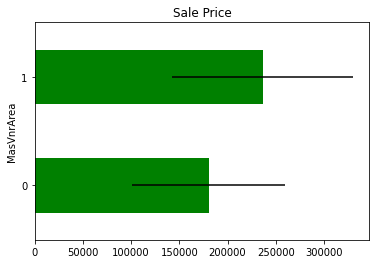

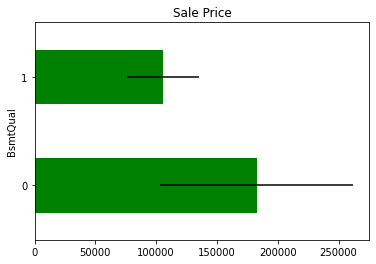

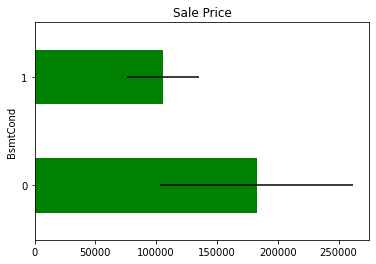

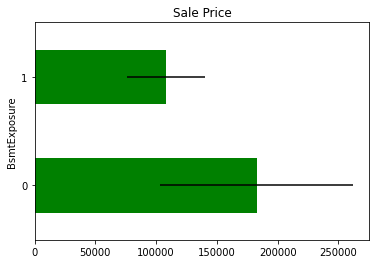

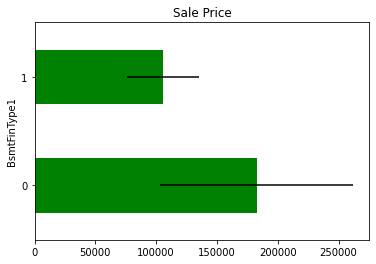

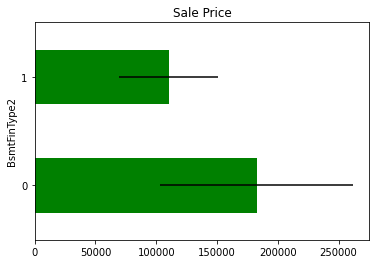

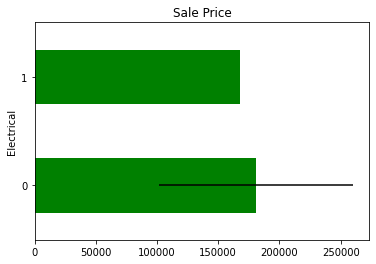

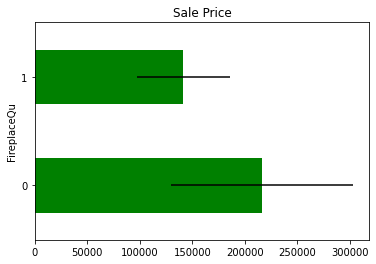

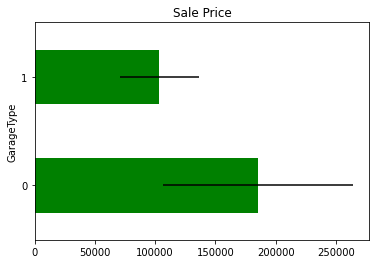

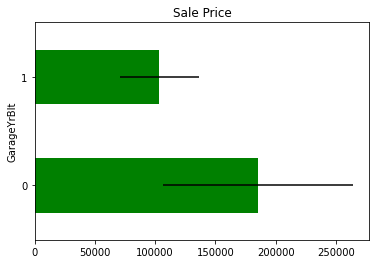

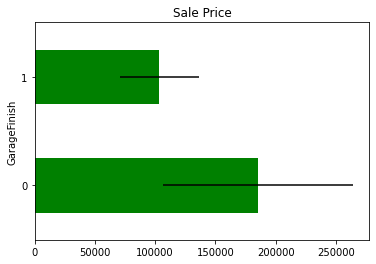

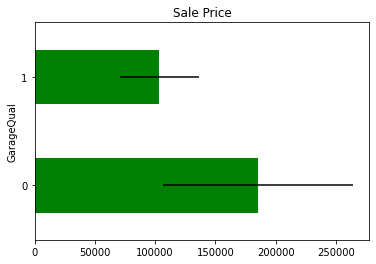

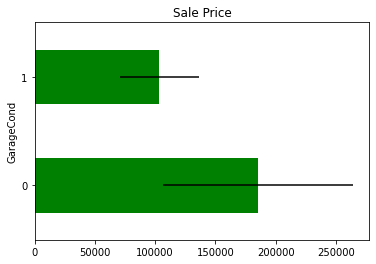

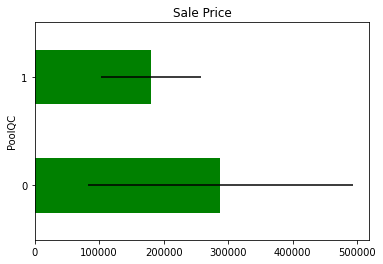

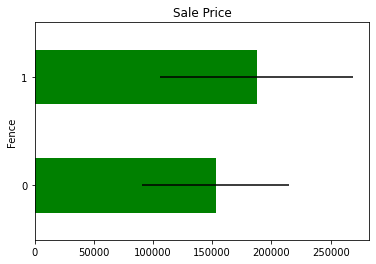

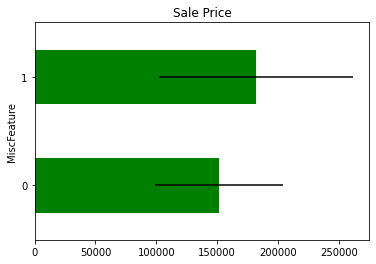

In [17]:
#Run function on each varible with missing information
for var in vars_with_na:
  analyse_na_value(data, var)

#in some variables, the average sale price in houses where the information is missing, 
#differs from the average sale price in houses where the information exist
# this suggests that data being missing could be a good predictor of sale price

###Temporal Variables

We have 4 year variables in the dataset:

* YearBuilt: year in which the house was built
* YearRemodAdd: year in which the house was remodeled
* GarageYrBlt: year in which a garage was built
* YrSold: year in which the house was sold

We generally don't use date variables in their raw format. Instead, we extract information from them. For example, we can capture the difference in years between the year the house was built and the year the house was sold.

In [18]:
#List variables that contain year information

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
#explore the values of these temporal variables
for var in year_vars:
  print(var, data[var].unique())
  print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

#the values are years
#We can explore the evolution of the sale prie with the years in which the house was sold


Text(0, 0.5, 'Median House Price')

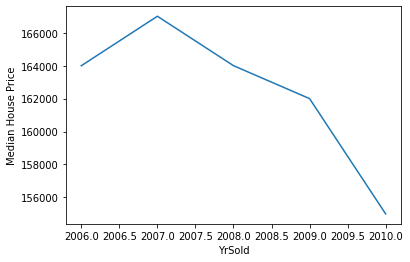

In [20]:
#Plot median sale price vs year in which it was sold
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

#There has been a drop in the value of houess. In real life the prices of houses goes up as the years go by

#Plot th price of sale vs year in which it was built

Text(0, 0.5, 'Median House Price')

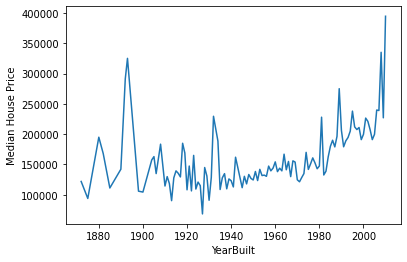

In [21]:
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

#We can see newly built houses seem to be more expensive
#Capture the elapsed years between the Year variables and the year in which the house was sold

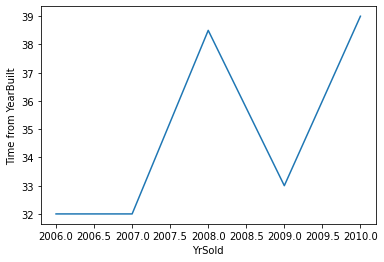

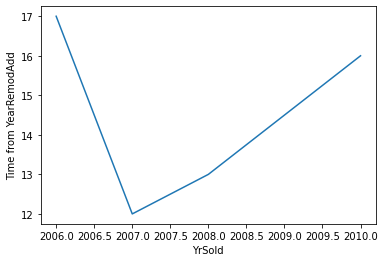

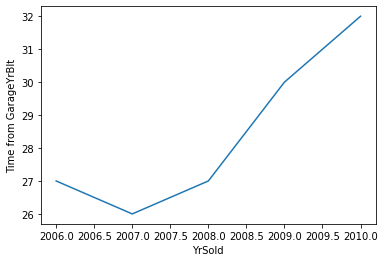

In [22]:
def analyse_year_vars(df,var):
  df = df.copy()
  #Capture difference between a year variable and year in which the house was sold
  df[var] = df['YrSold'] - df[var]

  df.groupby('YrSold')[var].median().plot()
  plt.ylabel('Time from ' + var)
  plt.show()

for var in year_vars:
  if var != 'YrSold':
    analyse_year_vars(data, var)


#We see that towards 2010, the houses had older garagesm and had not be remodelled recently. That might be why houses sold for less in the dataset

#Plot the time last remodelled and sale price to see if theres a relationship

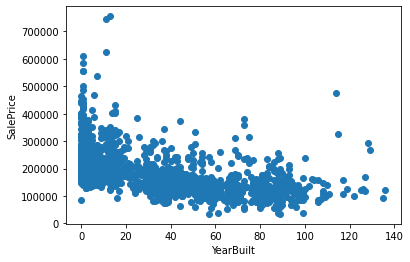

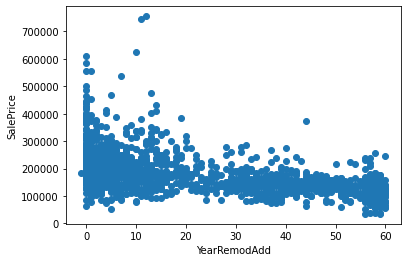

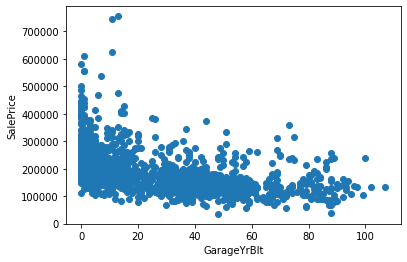

In [24]:
def analyse_year_vars(df, var):
  df = df.copy()

  #Capture differences between a year variable and year in which the house was sold
  df[var] = df['YrSold'] - df[var]
  plt.scatter(df[var], df["SalePrice"])
  plt.ylabel('SalePrice')
  plt.xlabel(var)
  plt.show()

for var in year_vars:
  if var != 'YrSold':
    analyse_year_vars(data, var)

We see that there is a tendency to a decrease in pricem with older houses. The longer the time between the house was built and sale date, the lower the sale price.

###Discrete varibles

#Lets find out which variables are discrete, i.e. show a finite number of values


In [26]:
#Lets make a list of discrete varibles
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars
]
print('Number of discrete variables: ' , len(discrete_vars))

Number of discrete variables:  13


In [27]:
#Lets visualise the discrete variables
data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


These discrete variables tend to be qualifications (Qual) or grading scales (Cond) or refer to the number of rooms or units (FullBath, GarageCars), or indicate the area of the room (KitchenAbvGr)
We expect higher prices with bigger numbers

lets analyse their contribution to the house price
MoSolid in the month in which the house was sold

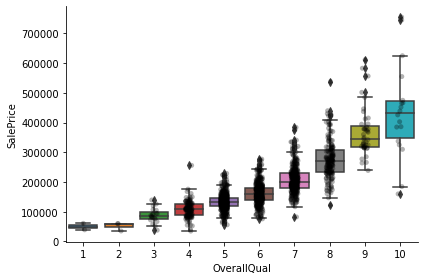

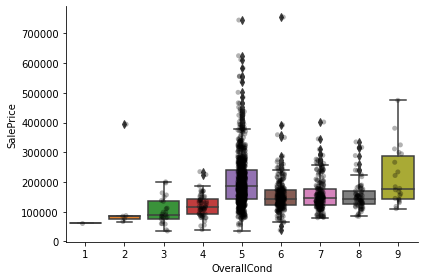

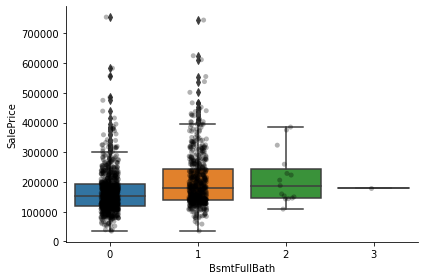

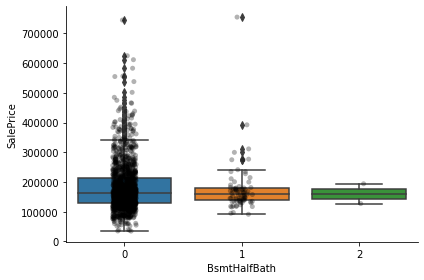

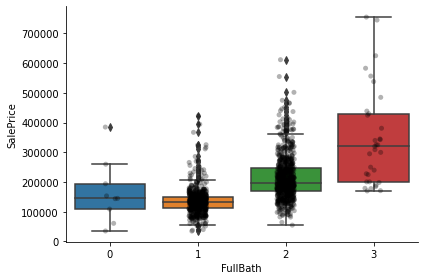

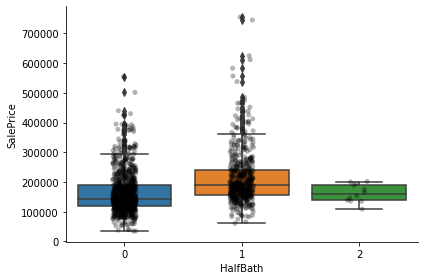

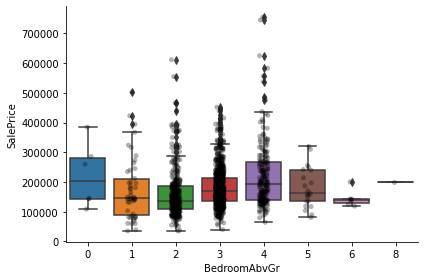

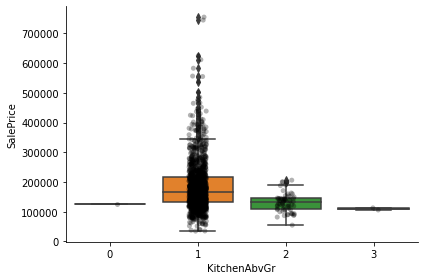

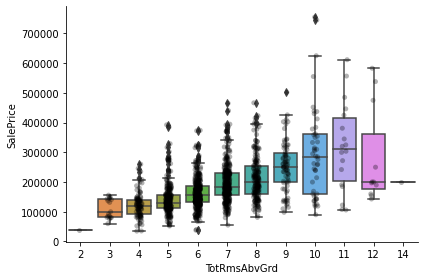

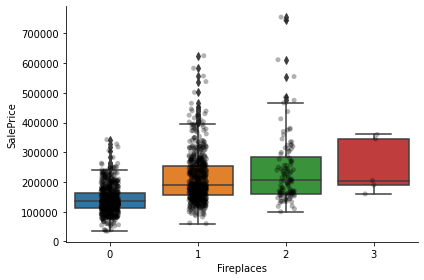

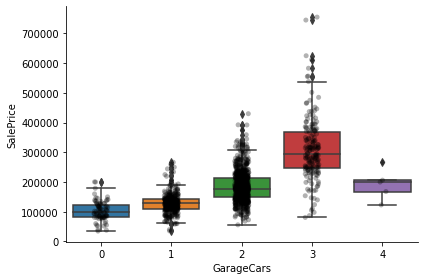

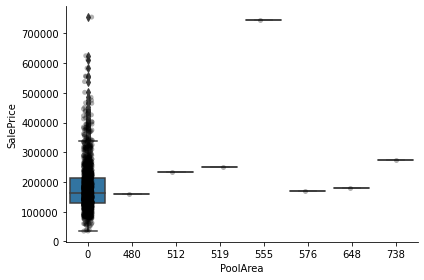

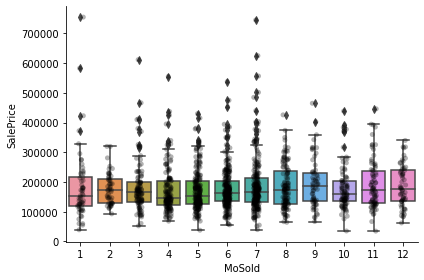

In [29]:
for var in discrete_vars:
  #make boxplot with Catplot
  sns.catplot(x=var, y = 'SalePrice', data = data, kind = "box", height = 4, aspect = 1.5)
  # add data points to boxplot with stripplot)
  sns.stripplot(x=var, y = 'SalePrice', data = data, jitter = 0.1, alpha = 0.3, color='k')
  plt.show()

For most discrete numerical variables, we see an increase in the sale price, with the quality or overall condition, or number of rooms, or surface.

For some varibles, we do not see this tendency. Most likely that variable is not a good predictor of sale price

###Continuous varibles

Lets go ahead and find the distribution of the coninuous varibles. We will consider contionuous varibles to all those that are not temporal or discrete.

In [31]:
#Make list of continuous variables
cont_vars = [
             var for var in num_vars if var not in discrete_vars+year_vars]
            
print('Number of continous variables: ', len(cont_vars))

Number of continous variables:  18


In [32]:
#Visualise the continous variables
data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


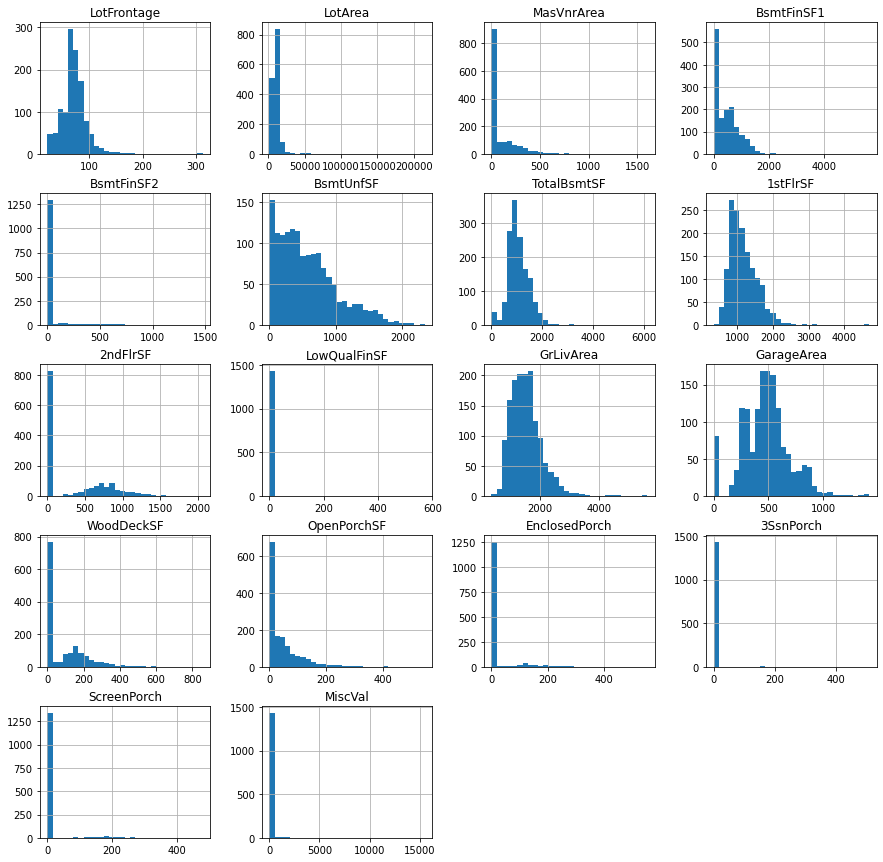

In [33]:
#Lets plot the histogram for all continuous variables

data[cont_vars].hist(bins=30, figsize = (15, 15))
plt.show()

The variables are noto normally distributed. And there are a particular few that are extremely skewed like 3snPorch, ScreenPorch, and MiscVal.

Sometimes transforming the variables to improve value spread improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramtically.

Apply a Yeo-Johnson trasformation to LotFrontage, LotArea, BsmUnfSF, and binary transformation to 3SsnPorch, ScreenPorch, and MiscVal

In [34]:
#Make a list with the super skewed variables for later
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [35]:
#Capture the remaining continuous variables
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',        
]

###Yeo-Johnson transformation

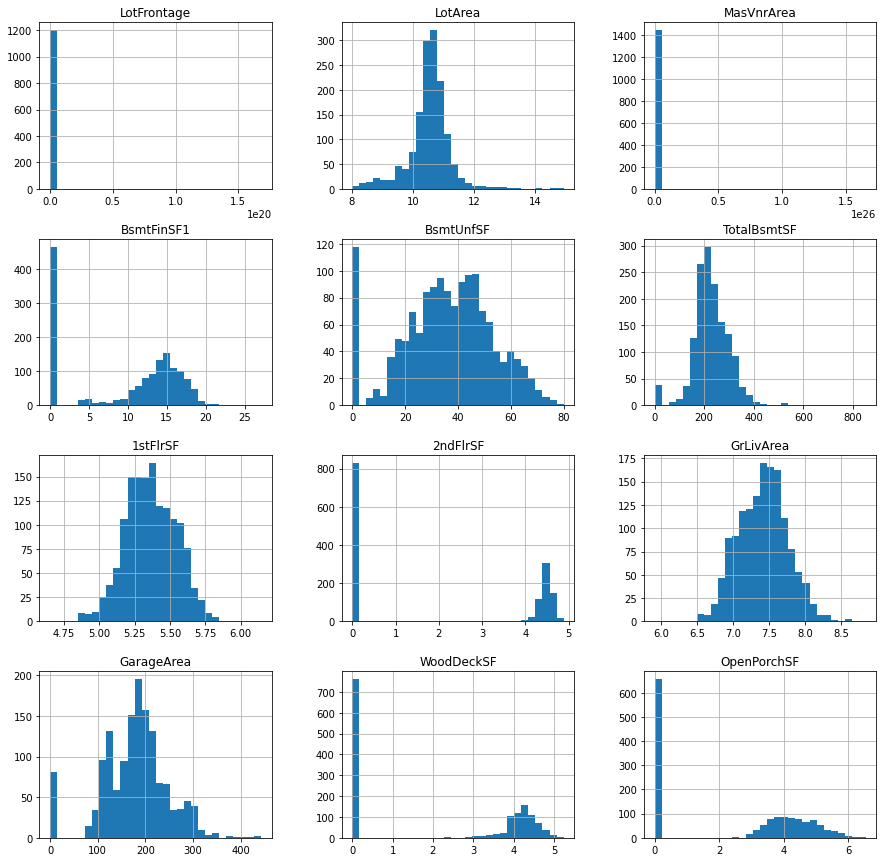

In [37]:
#Lets analyse the distribution of the variables after applying a Yeo-Johnson transformation

#Temporary copy of the data
tmp = data.copy()

for var in cont_vars:

  #Transform the variable - yeo-johnson
  tmp[var], param = stats.yeojohnson(data[var])

#Plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

for LotFrontage and MasVnrArea the transformation did not do an amazing job.
For others, the values seem to be spread more evenly in the range.

Whether this helps improve the predictive power remains to be seen. To determine if this is the case, we should train a model with the original values and one with the transformed values, and determine model performance, and feature performance.
